In [1]:
import numpy as np
import matplotlib.pyplot as plt
import colors
from matplotlib import gridspec
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
orange = ["#ff8c00"]
blue = ["#4173b3"]
green = ["#66cdaa"]
red = ["#e85c47"]
alpha = [0.5,0.4,0.3,0.2,0.1,0.0]
beta = [0.9,0.8,0.6,0.4,0.2,0.1]
for i,c in enumerate(alpha):
        orange.append(colors.get_alpha_hex(orange[0],beta[i]))
        blue.append(colors.get_alpha_hex(blue[0],beta[i]))
        green.append(colors.get_alpha_hex(green[0],beta[i]))
        red.append(colors.get_alpha_hex(red[0],beta[i]))

In [3]:
dataFile = '../data/spatEE_gs_18_18_09_+0.001_+10.000_0081.dat'
data = np.loadtxt(dataFile)
U_L18 = data[:,0]
Eg_L18 = data[:,1]
S1acc_L18 = data[:,3]

dataFile = '../data/spatEE_gs_04_18_18_09_+0.001_+10.000_0081.dat'
data = np.loadtxt(dataFile)
U_L18_04 = data[:,0]
Eg_L18_04 = data[:,1]
S1acc_L18_04 = data[:,3]

dataFile = '../data/spatEE_err_2_19_+ 0.01_18.dat'
data = np.loadtxt(dataFile)
L_U = data[:,0]
Eg_U = data[:,1]
S1acc_U = data[:,3]

dataFile = '../data/spatEE_err_06_7_19_+ 0.01_13.dat'
data = np.loadtxt(dataFile)
L_U_06 = data[:,0]
Eg_U_06 = data[:,1]
S1acc_U_06 = data[:,3]

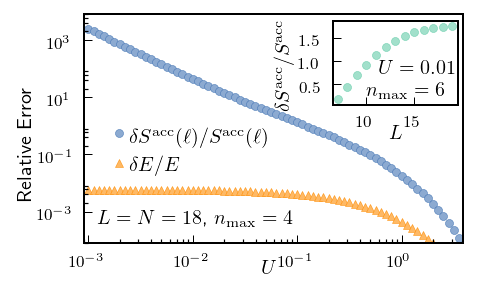

In [4]:
with plt.style.context('./aps.mplstyle'):
    fig = plt.figure()
    
    #Principal Plot
    ax =fig.add_subplot(111)
    ax.plot(U_L18[::1], abs((S1acc_L18_04-S1acc_L18)/S1acc_L18)[::1], 'o',  label=r'$\delta S^{\rm{acc}}(\ell) /S^{\rm{acc}}(\ell)$', markersize = 4, markerfacecolor = blue[3], markeredgewidth = '0.25', color=blue[0],zorder=1)
    ax.plot(U_L18[::1], ((Eg_L18-Eg_L18_04)/Eg_L18)[::1], '^',  label=r'$\delta E /E$', markersize = 4, markerfacecolor = orange[3], markeredgewidth = '0.25', color=orange[0],zorder=1)
    lgnd = plt.legend(loc=(0.073,0.25), handlelength=0,handleheight=1.5,title=None,frameon=False)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_ylim(0.8e-4,8000)
    ax.set_xlim(9e-4, 3.90)
    ax.set_xlabel(r'$U$')
    ax.xaxis.set_label_coords(0.49  ,-.06)
    ax.set_ylabel(r'Relative Error')
    ax.tick_params(axis='x', top="off",which='both',labeltop='off')
    ax.tick_params(axis='y', right="off",which='both',labeltop='off')
    ax.text(0.0012, 0.0004, r'$L=N=18$, $n_{\rm{max}}=4$')

    #Inset Plot
    left, bottom, width, height = [0.633, 0.58, 0.255, 0.277]
    axin = fig.add_axes([left,bottom,width,height])
    axin.plot(L_U_06[:], abs((S1acc_U_06[0:]-S1acc_U[5:])/S1acc_U[5:]), 'o',  label=None, markersize = 4, markerfacecolor = green[3], markeredgewidth = '0.25', color=green[0],zorder=1)

    axin.set_ylabel(r'$\delta S^{\rm{acc}} /S^{\rm{acc}}$')
    axin.set_xlabel(r'$L$', labelpad=-4)
    axin.text(10,0.27, r'$n_{\rm{max}}=6$')
    axin.text(11.3,0.75, r'$U=0.01$')
    axin.set_ylim(0.050,1.87)
    axin.set_xlim(6.45, 19.55)
    axin.tick_params(axis='x', top="off",which='both',labeltop='off')
    axin.tick_params(axis='y', right="off",which='both',labeltop='off')

    plt.savefig('../figures/RestrictedOccupationNumber.pdf', transparent=False)    
    plt.savefig('../figures/RestrictedOccupationNumber.svg', transparent=False)    
    plt.show